In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial import KDTree
from bayesian import BOE

In [2]:
# Obtain coordinates and function
data = np.load('../data/cnn_embedding.npz')
coordinates = data['emb']
coodinates = coordinates/np.max(coordinates, axis=0)*5

def f(x):
    x = np.atleast_2d(x)
    fc = -197.68+5/14*(1106.9+np.sum(x**2-5.0*np.cos(2*np.pi*x), axis=1))[:,None]
    return fc
f_c = f(coordinates) 

# Function evaluated at coordinated
ind = np.random.randint(coordinates.shape[0])
x = np.atleast_2d(coordinates[ind,:])
y = np.atleast_2d(f_c[ind,:])

In [3]:
# Set up optimization model
optimizer = BOE(coordinates)

# Initialize KDTree
nn_tree = KDTree(coordinates)

In [4]:
# Optimize function
for __ in range(15):
    optimizer.optimize(x, y)
    x = optimizer.next_sample
    dist, ind = nn_tree.query(x, k=1)
    y = np.atleast_2d(f_c[ind])

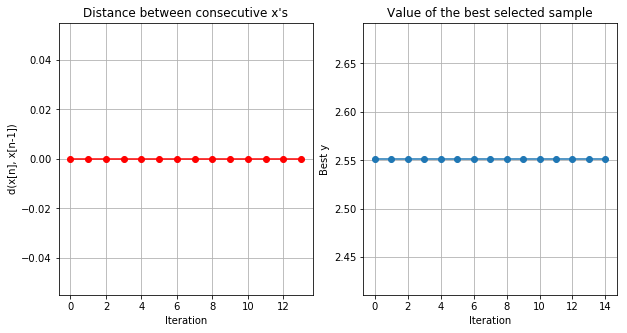

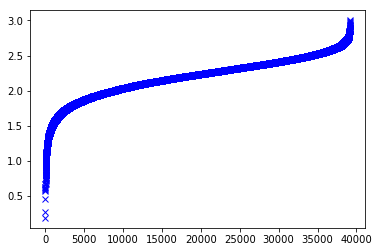

In [5]:
# Check for convergence
optimizer.model.plot_convergence()
plt.plot(sorted(f_c), 'bx')

In [6]:
optimizer._Y

array([[ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048],
       [ 2.55148048]])